<a href="https://colab.research.google.com/github/ekvirika/WalmartRecruiting/blob/main/notebooks/model_experiment_xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Install required packages
!pip install wandb torch torchvision pandas numpy matplotlib seaborn scikit-learn

# Set up Kaggle API
!pip install kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 772.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 39.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [3]:

# Upload your kaggle.json to Colab and run:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/ColabNotebooks/kaggle_API_credentials/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [4]:

# Download the dataset
!kaggle competitions download -c walmart-recruiting-store-sales-forecasting
!unzip -q walmart-recruiting-store-sales-forecasting.zip

  0% 0.00/2.70M [00:00<?, ?B/s]
100% 2.70M/2.70M [00:00<00:00, 801MB/s]


In [5]:
!unzip -q train.csv.zip
!unzip -q stores.csv.zip
!unzip -q test.csv.zip
!unzip -q features.csv.zip

unzip:  cannot find or open stores.csv.zip, stores.csv.zip.zip or stores.csv.zip.ZIP.


In [6]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 12.5 MB/s eta 0:00:00


# Experiment 1

2025/07/07 19:04:28 INFO mlflow.tracking.fluent: Experiment with name 'XGBoost_Training' does not exist. Creating a new experiment.


Starting Walmart XGBoost Experiment...

1. Loading data...
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')
Training data shape: (421570, 16)
Test data shape: (115064, 15)

2. Data cleaning...
Missing values before cleaning: 1422431
Missing values after cleaning: 4272

3. Feature engineering...
Number of features: 39
Training data shape after feature engineering: (261046, 43)

4. Creating pipeline...

5. Cross validation...
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Cross-validation MAE: 954.7840 ± 229.6983
Cross-validation WMAE: 997.9547 ± 243.0787

6. Hyperparameter tuning...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'model__subsample': 0.9, 'model__n_estimators': 500, 'model__max_depth': 10, 'model__learning_rate': 0.05, 'model__colsample_bytree': 0.8}
Best CV score: 918.1206

7. Final training...


2025/07/07 19:45:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/07 19:45:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'WalmartSales_XGBoost'.
Created version '1' of model 'WalmartSales_XGBoost'.


Model training completed and saved to MLflow

8. Generating predictions...
Predictions generated for 115064 test samples
Submission file saved as 'xgboost_submission.csv'

XGBoost Experiment completed successfully!
Final CV WMAE score: 997.9547

ADDITIONAL ANALYSIS


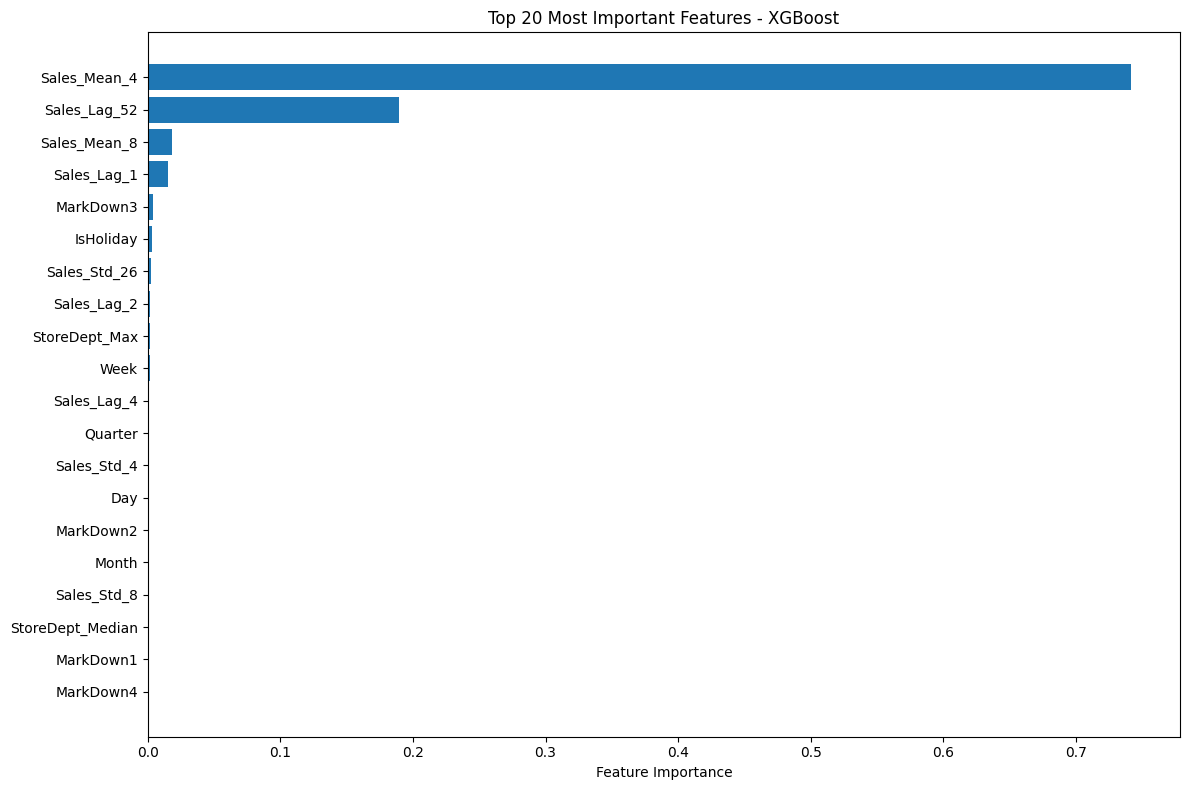

Feature importance analysis completed!

Memory cleaned up. Experiment finished!


In [7]:
# # model_experiment_xgboost.ipynb
# # Walmart Sales Forecasting - XGBoost Model

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')

# # ML Libraries
# import xgboost as xgb
# from sklearn.model_selection import TimeSeriesSplit
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.pipeline import Pipeline

# # Experiment Tracking
# import mlflow
# import mlflow.xgboost
# import mlflow.sklearn

# # Utilities
# import pickle
# import joblib
# from datetime import datetime, timedelta
# import gc

# # Configuration
# mlflow.set_experiment("XGBoost_Training")

# class WalmartXGBoostExperiment:
#     def __init__(self):
#         self.data = None
#         self.train_data = None
#         self.test_data = None
#         self.features = None
#         self.target = 'Weekly_Sales'
#         self.model = None
#         self.pipeline = None

#     def load_data(self):
#         """მონაცემების ჩატვირთვა"""
#         with mlflow.start_run(run_name="XGBoost_Data_Loading"):
#             # Load datasets
#             train_df = pd.read_csv('/content/train.csv')
#             stores_df = pd.read_csv('/content/stores.csv')
#             features_df = pd.read_csv('/content/features.csv')
#             test_df = pd.read_csv('/content/test.csv')

#             print(train_df.columns)

#             # Log data info
#             mlflow.log_param("train_shape", train_df.shape)
#             mlflow.log_param("test_shape", test_df.shape)
#             mlflow.log_param("stores_count", stores_df.shape[0])

#             # Merge datasets
#             train_merged = train_df.merge(stores_df, on='Store')
#             train_merged = train_merged.merge(features_df, on=['Store', 'Date'], how='left')

#             test_merged = test_df.merge(stores_df, on='Store')
#             test_merged = test_merged.merge(features_df, on=['Store', 'Date'], how='left')

#             if 'IsHoliday_x' in train_merged.columns and 'IsHoliday_y' in train_merged.columns:
#                 # Prefer the IsHoliday from train.csv (x)
#                 train_merged['IsHoliday'] = train_merged['IsHoliday_x']
#                 test_merged['IsHoliday'] = test_merged['IsHoliday_x']
#                 train_merged.drop(columns=['IsHoliday_x', 'IsHoliday_y'], inplace=True)
#                 test_merged.drop(columns=['IsHoliday_x', 'IsHoliday_y'], inplace=True)
#             elif 'IsHoliday' not in train_merged.columns:
#                 raise KeyError("No 'IsHoliday' column found after merging datasets.")

#             self.train_data = train_merged
#             self.test_data = test_merged

#             print(f"Training data shape: {self.train_data.shape}")
#             print(f"Test data shape: {self.test_data.shape}")

#     def data_cleaning(self):
#         """მონაცემების გაწმენდა"""
#         with mlflow.start_run(run_name="XGBoost_Cleaning"):
#             # Handle missing values
#             missing_before = self.train_data.isnull().sum().sum()

#             # Fill missing values in features
#             numeric_cols = self.train_data.select_dtypes(include=[np.number]).columns
#             for col in numeric_cols:
#                 if col != self.target:
#                     self.train_data[col] = self.train_data[col].fillna(
#                         self.train_data.groupby(['Store', 'Dept'])[col].transform('median')
#                     )
#                     self.test_data[col] = self.test_data[col].fillna(
#                         self.test_data.groupby(['Store', 'Dept'])[col].transform('median')
#                     )

#             # Handle categorical variables
#             categorical_cols = ['Type']
#             for col in categorical_cols:
#                 if col in self.train_data.columns:
#                     le = LabelEncoder()
#                     self.train_data[col] = le.fit_transform(self.train_data[col].astype(str))
#                     # Handle unseen labels in test
#                     self.test_data[col] = self.test_data[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)


#             missing_after = self.train_data.isnull().sum().sum()

#             mlflow.log_param("missing_values_before", missing_before)
#             mlflow.log_param("missing_values_after", missing_after)

#             print(f"Missing values before cleaning: {missing_before}")
#             print(f"Missing values after cleaning: {missing_after}")

#     def feature_engineering(self):
#       """ფიჩერების შექმნა"""
#       with mlflow.start_run(run_name="XGBoost_Feature_Engineering"):

#           def create_features(df):
#               df['Date'] = pd.to_datetime(df['Date'])

#               df['Year'] = df['Date'].dt.year
#               df['Month'] = df['Date'].dt.month
#               df['Week'] = df['Date'].dt.isocalendar().week
#               df['Day'] = df['Date'].dt.day
#               df['DayOfWeek'] = df['Date'].dt.dayofweek
#               df['Quarter'] = df['Date'].dt.quarter

#               if 'IsHoliday' in df.columns:
#                   df['IsHoliday'] = df['IsHoliday'].astype(int)

#               df = df.sort_values(['Store', 'Dept', 'Date'])

#               if 'Weekly_Sales' in df.columns:
#                   for lag in [1, 2, 4, 8, 12, 52]:
#                       df[f'Sales_Lag_{lag}'] = df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(lag)

#                   for window in [4, 8, 12, 26]:
#                       df[f'Sales_Mean_{window}'] = (
#                           df.groupby(['Store', 'Dept'])['Weekly_Sales']
#                           .transform(lambda x: x.rolling(window).mean())
#                       )
#                       df[f'Sales_Std_{window}'] = (
#                           df.groupby(['Store', 'Dept'])['Weekly_Sales']
#                           .transform(lambda x: x.rolling(window).std())
#                       )

#               if 'Weekly_Sales' in df.columns:
#                   stats = df.groupby(['Store', 'Dept'])['Weekly_Sales'].agg(['mean', 'std', 'min', 'max', 'median']).reset_index()
#                   stats.columns = ['Store', 'Dept', 'StoreDept_Mean', 'StoreDept_Std', 'StoreDept_Min', 'StoreDept_Max', 'StoreDept_Median']
#                   df = df.merge(stats, on=['Store', 'Dept'], how='left')

#               if 'MarkDown1' in df.columns:
#                   markdown_cols = [col for col in df.columns if 'MarkDown' in col]
#                   df['Total_MarkDown'] = df[markdown_cols].sum(axis=1)
#                   df['MarkDown_Count'] = (df[markdown_cols] > 0).sum(axis=1)

#               return df

#           # Combine last 52 weeks of train + test
#           # Ensure Date is in datetime format
#           self.train_data['Date'] = pd.to_datetime(self.train_data['Date'])
#           self.test_data['Date'] = pd.to_datetime(self.test_data['Date'])

#           # Now you can subtract timedelta
#           train_recent = self.train_data[self.train_data['Date'] >= self.train_data['Date'].max() - pd.Timedelta(weeks=52)]
#           combined = pd.concat([train_recent, self.test_data], sort=False)
#           combined = create_features(combined)

#           # Split again
#           self.train_data = create_features(self.train_data)
#           self.test_data = combined[combined['Date'] >= self.test_data['Date'].min()].copy()

#           # Drop NaNs from lagged train
#           self.train_data = self.train_data.dropna()

#           exclude_cols = ['Date', 'Weekly_Sales', 'Store', 'Dept']
#           self.features = [col for col in self.train_data.columns if col not in exclude_cols]

#           mlflow.log_param("num_features", len(self.features))
#           mlflow.log_param("features_list", self.features)

#           print(f"Number of features: {len(self.features)}")
#           print(f"Training data shape after feature engineering: {self.train_data.shape}")


#     def create_pipeline(self):
#         """Pipeline-ის შექმნა"""
#         with mlflow.start_run(run_name="XGBoost_Pipeline_Creation"):

#             # XGBoost model
#             xgb_model = xgb.XGBRegressor(
#                 n_estimators=1000,
#                 max_depth=6,
#                 learning_rate=0.1,
#                 subsample=0.8,
#                 colsample_bytree=0.8,
#                 random_state=42,
#                 n_jobs=-1
#             )

#             # Create pipeline
#             self.pipeline = Pipeline([
#                 ('scaler', StandardScaler()),
#                 ('model', xgb_model)
#             ])

#             mlflow.log_param("model_type", "XGBoost")
#             mlflow.log_params(xgb_model.get_params())

#     def wmae_score(self, y_true, y_pred, weights):
#         """WMAE მეტრიკის გამოთვლა"""
#         return np.sum(weights * np.abs(y_true - y_pred)) / np.sum(weights)

#     def time_series_cv(self):
#         """Time Series Cross Validation"""
#         with mlflow.start_run(run_name="XGBoost_Cross_Validation"):

#             X = self.train_data[self.features]
#             y = self.train_data[self.target]

#             # Create weights (5 for holiday weeks, 1 otherwise)
#             weights = np.where(self.train_data['IsHoliday'] == 1, 5, 1)

#             # Time series split
#             tscv = TimeSeriesSplit(n_splits=5)

#             cv_scores = []
#             wmae_scores = []

#             for fold, (train_idx, val_idx) in enumerate(tscv.split(X)):
#                 print(f"Fold {fold + 1}/5")

#                 X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
#                 y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
#                 weights_train, weights_val = weights[train_idx], weights[val_idx]

#                 # Train model
#                 self.pipeline.fit(X_train_fold, y_train_fold)

#                 # Predict
#                 y_pred_val = self.pipeline.predict(X_val_fold)

#                 # Calculate metrics
#                 mae = mean_absolute_error(y_val_fold, y_pred_val)
#                 wmae = self.wmae_score(y_val_fold, y_pred_val, weights_val)

#                 cv_scores.append(mae)
#                 wmae_scores.append(wmae)

#                 mlflow.log_metric(f"fold_{fold+1}_mae", mae)
#                 mlflow.log_metric(f"fold_{fold+1}_wmae", wmae)

#             avg_mae = np.mean(cv_scores)
#             avg_wmae = np.mean(wmae_scores)

#             mlflow.log_metric("cv_mae_mean", avg_mae)
#             mlflow.log_metric("cv_wmae_mean", avg_wmae)
#             mlflow.log_metric("cv_mae_std", np.std(cv_scores))
#             mlflow.log_metric("cv_wmae_std", np.std(wmae_scores))

#             print(f"Cross-validation MAE: {avg_mae:.4f} ± {np.std(cv_scores):.4f}")
#             print(f"Cross-validation WMAE: {avg_wmae:.4f} ± {np.std(wmae_scores):.4f}")

#             return avg_wmae

#     def hyperparameter_tuning(self):
#         """ჰიპერპარამეტრების ოპტიმიზაცია"""
#         with mlflow.start_run(run_name="XGBoost_Hyperparameter_Tuning"):

#             from sklearn.model_selection import RandomizedSearchCV

#             # Parameter grid
#             param_dist = {
#                 'model__n_estimators': [500, 1000, 1500],
#                 'model__max_depth': [4, 6, 8, 10],
#                 'model__learning_rate': [0.05, 0.1, 0.15, 0.2],
#                 'model__subsample': [0.7, 0.8, 0.9],
#                 'model__colsample_bytree': [0.7, 0.8, 0.9]
#             }

#             X = self.train_data[self.features]
#             y = self.train_data[self.target]

#             # Custom scorer for WMAE
#             def wmae_scorer(estimator, X, y):
#                 y_pred = estimator.predict(X)
#                 # Assume all weights are 1 for simplicity in grid search
#                 weights = np.ones(len(y))
#                 return -self.wmae_score(y, y_pred, weights)  # Negative because sklearn maximizes

#             # Randomized search
#             random_search = RandomizedSearchCV(
#                 self.pipeline,
#                 param_distributions=param_dist,
#                 n_iter=20,
#                 cv=TimeSeriesSplit(n_splits=3),
#                 scoring=wmae_scorer,
#                 n_jobs=-1,
#                 random_state=42,
#                 verbose=1
#             )

#             random_search.fit(X, y)

#             # Log best parameters
#             best_params = random_search.best_params_
#             mlflow.log_params(best_params)
#             mlflow.log_metric("best_cv_score", -random_search.best_score_)

#             # Update pipeline with best parameters
#             self.pipeline = random_search.best_estimator_

#             print(f"Best parameters: {best_params}")
#             print(f"Best CV score: {-random_search.best_score_:.4f}")

#     def final_training(self):
#         """საბოლოო მოდელის ტრენინგი"""
#         with mlflow.start_run(run_name="XGBoost_Final_Training"):

#             X = self.train_data[self.features]
#             y = self.train_data[self.target]

#             # Train final model
#             self.pipeline.fit(X, y)

#             # Feature importance
#             feature_importance = self.pipeline.named_steps['model'].feature_importances_
#             feature_names = self.features

#             # Log feature importance
#             for name, importance in zip(feature_names, feature_importance):
#                 mlflow.log_metric(f"feature_importance_{name}", importance)

#             # Save model
#             mlflow.sklearn.log_model(
#                 self.pipeline,
#                 "xgboost_model",
#                 registered_model_name="WalmartSales_XGBoost"
#             )

#             # Save feature names
#             with open("features.pkl", "wb") as f:
#                 pickle.dump(self.features, f)
#             mlflow.log_artifact("features.pkl")


#             print("Model training completed and saved to MLflow")

#     def generate_predictions(self):
#         """ტესტ სეტზე პროგნოზების გენერირება"""
#         with mlflow.start_run(run_name="XGBoost_Test_Predictions"):

#             # Make predictions
#             X_test = self.test_data[self.features]
#             predictions = self.pipeline.predict(X_test)

#             # Create submission file
#             submission = pd.DataFrame({
#                 'Id': self.test_data['Store'].astype(str) + '_' +
#                      self.test_data['Dept'].astype(str) + '_' +
#                      self.test_data['Date'].astype(str),
#                 'Weekly_Sales': predictions
#             })

#             submission.to_csv('xgboost_submission.csv', index=False)
#             mlflow.log_artifact('xgboost_submission.csv')

#             print(f"Predictions generated for {len(predictions)} test samples")
#             print("Submission file saved as 'xgboost_submission.csv'")

#     def run_full_experiment(self):
#         """სრული ექსპერიმენტის გაშვება"""
#         print("Starting Walmart XGBoost Experiment...")

#         # Step 1: Load data
#         print("\n1. Loading data...")
#         self.load_data()

#         # Step 2: Data cleaning
#         print("\n2. Data cleaning...")
#         self.data_cleaning()

#         # Step 3: Feature engineering
#         print("\n3. Feature engineering...")
#         self.feature_engineering()

#         # Step 4: Create pipeline
#         print("\n4. Creating pipeline...")
#         self.create_pipeline()

#         # Step 5: Cross validation
#         print("\n5. Cross validation...")
#         cv_score = self.time_series_cv()

#         # Step 6: Hyperparameter tuning
#         print("\n6. Hyperparameter tuning...")
#         self.hyperparameter_tuning()

#         # Step 7: Final training
#         print("\n7. Final training...")
#         self.final_training()

#         # Step 8: Generate predictions
#         print("\n8. Generating predictions...")
#         self.generate_predictions()

#         print("\nXGBoost Experiment completed successfully!")
#         print(f"Final CV WMAE score: {cv_score:.4f}")

# # Main execution
# if __name__ == "__main__":
#     # Initialize experiment
#     experiment = WalmartXGBoostExperiment()

#     # Run full experiment
#     experiment.run_full_experiment()

#     # Additional analysis and visualizations
#     print("\n" + "="*50)
#     print("ADDITIONAL ANALYSIS")
#     print("="*50)

#     # Feature importance visualization
#     if experiment.pipeline is not None:
#         feature_importance = experiment.pipeline.named_steps['model'].feature_importances_
#         feature_names = experiment.features

#         # Create feature importance dataframe
#         importance_df = pd.DataFrame({
#             'feature': feature_names,
#             'importance': feature_importance
#         }).sort_values('importance', ascending=False)

#         # Plot top 20 features
#         plt.figure(figsize=(12, 8))
#         top_features = importance_df.head(20)
#         plt.barh(range(len(top_features)), top_features['importance'])
#         plt.yticks(range(len(top_features)), top_features['feature'])
#         plt.xlabel('Feature Importance')
#         plt.title('Top 20 Most Important Features - XGBoost')
#         plt.gca().invert_yaxis()
#         plt.tight_layout()
#         plt.savefig('xgboost_feature_importance.png', dpi=300, bbox_inches='tight')
#         plt.show()

#         print("Feature importance analysis completed!")

#     # Memory cleanup
#     gc.collect()
#     print("\nMemory cleaned up. Experiment finished!")

# # Sample configuration for different experiments
# EXPERIMENT_CONFIGS = {
#     'baseline': {
#         'n_estimators': 500,
#         'max_depth': 6,
#         'learning_rate': 0.1,
#         'subsample': 0.8,
#         'colsample_bytree': 0.8
#     },
#     'deep_trees': {
#         'n_estimators': 1000,
#         'max_depth': 10,
#         'learning_rate': 0.05,
#         'subsample': 0.8,
#         'colsample_bytree': 0.8
#     },
#     'regularized': {
#         'n_estimators': 1500,
#         'max_depth': 4,
#         'learning_rate': 0.1,
#         'subsample': 0.7,
#         'colsample_bytree': 0.7,
#         'reg_alpha': 1,
#         'reg_lambda': 1
#     }
# }



# Experiment 2

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

import mlflow
import mlflow.xgboost
import mlflow.sklearn

import pickle
import gc
from datetime import datetime

# Experiment configurations
EXPERIMENT_CONFIGS = {
    'baseline': {
        'n_estimators': 500,
        'max_depth': 6,
        'learning_rate': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 0.8
    },
    'deep_trees': {
        'n_estimators': 1000,
        'max_depth': 10,
        'learning_rate': 0.05,
        'subsample': 0.8,
        'colsample_bytree': 0.8
    },
    'regularized': {
        'n_estimators': 1500,
        'max_depth': 4,
        'learning_rate': 0.1,
        'subsample': 0.7,
        'colsample_bytree': 0.7,
        'reg_alpha': 1,
        'reg_lambda': 1
    }
}

class WalmartXGBoostExperiment:
    def __init__(self, config_name='baseline', config_dict=None):
        self.config_name = config_name
        self.config = config_dict or {}
        self.data = None
        self.train_data = None
        self.test_data = None
        self.features = None
        self.target = 'Weekly_Sales'
        self.pipeline = None

        mlflow.set_experiment(f"XGBoost_{self.config_name}")

    def load_data(self):
        with mlflow.start_run(run_name="Data_Loading"):
            train_df = pd.read_csv('/content/train.csv')
            stores_df = pd.read_csv('/content/stores.csv')
            features_df = pd.read_csv('/content/features.csv')
            test_df = pd.read_csv('/content/test.csv')

            train_merged = train_df.merge(stores_df, on='Store')
            train_merged = train_merged.merge(features_df, on=['Store', 'Date'], how='left')
            test_merged = test_df.merge(stores_df, on='Store')
            test_merged = test_merged.merge(features_df, on=['Store', 'Date'], how='left')

            if 'IsHoliday_x' in train_merged.columns:
                train_merged['IsHoliday'] = train_merged['IsHoliday_x']
                test_merged['IsHoliday'] = test_merged['IsHoliday_x']
                train_merged.drop(columns=['IsHoliday_x', 'IsHoliday_y'], inplace=True)
                test_merged.drop(columns=['IsHoliday_x', 'IsHoliday_y'], inplace=True)

            self.train_data = train_merged
            self.test_data = test_merged

    def data_cleaning(self):
        with mlflow.start_run(run_name="Data_Cleaning"):
            numeric_cols = self.train_data.select_dtypes(include=[np.number]).columns
            for col in numeric_cols:
                if col != self.target:
                    self.train_data[col] = self.train_data.groupby(['Store', 'Dept'])[col].transform(lambda x: x.fillna(x.median()))
                    self.test_data[col] = self.test_data.groupby(['Store', 'Dept'])[col].transform(lambda x: x.fillna(x.median()))

            if 'Type' in self.train_data:
                le = LabelEncoder()
                self.train_data['Type'] = le.fit_transform(self.train_data['Type'].astype(str))
                self.test_data['Type'] = self.test_data['Type'].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

    def feature_engineering(self):
        with mlflow.start_run(run_name="Feature_Engineering"):
            def create_features(df):
                df['Date'] = pd.to_datetime(df['Date'])
                df['Year'] = df['Date'].dt.year
                df['Month'] = df['Date'].dt.month
                df['Week'] = df['Date'].dt.isocalendar().week
                df['DayOfWeek'] = df['Date'].dt.dayofweek
                df['IsHoliday'] = df['IsHoliday'].astype(int)
                return df

            self.train_data = create_features(self.train_data)
            self.test_data = create_features(self.test_data)
            self.train_data.dropna(inplace=True)

            exclude = ['Date', 'Weekly_Sales', 'Store', 'Dept']
            self.features = [col for col in self.train_data.columns if col not in exclude]

    def create_pipeline(self):
        with mlflow.start_run(run_name="Pipeline_Creation"):
            xgb_model = xgb.XGBRegressor(**self.config, random_state=42, n_jobs=-1)
            self.pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('model', xgb_model)
            ])
            mlflow.set_tag("config_name", self.config_name)
            mlflow.log_params(self.config)

    def wmae_score(self, y_true, y_pred, weights):
        return np.sum(weights * np.abs(y_true - y_pred)) / np.sum(weights)

    def time_series_cv(self):
        with mlflow.start_run(run_name="Cross_Validation"):
            X = self.train_data[self.features]
            y = self.train_data[self.target]
            weights = np.where(self.train_data['IsHoliday'] == 1, 5, 1)
            tscv = TimeSeriesSplit(n_splits=5)
            mae_scores, wmae_scores = [], []

            for fold, (train_idx, val_idx) in enumerate(tscv.split(X)):
                X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
                y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
                w_val = weights[val_idx]
                self.pipeline.fit(X_train, y_train)
                y_pred = self.pipeline.predict(X_val)
                mae_scores.append(mean_absolute_error(y_val, y_pred))
                wmae_scores.append(self.wmae_score(y_val, y_pred, w_val))

            mlflow.log_metric("cv_mae", np.mean(mae_scores))
            mlflow.log_metric("cv_wmae", np.mean(wmae_scores))

            print(f"CV WMAE: {np.mean(wmae_scores):.4f}")
            return np.mean(wmae_scores)

    def final_training(self):
        with mlflow.start_run(run_name="Final_Training"):
            X = self.train_data[self.features]
            y = self.train_data[self.target]
            self.pipeline.fit(X, y)
            mlflow.sklearn.log_model(self.pipeline, "model", registered_model_name=f"WalmartSales_XGB_{self.config_name}")

    def generate_predictions(self):
        with mlflow.start_run(run_name="Generate_Predictions"):
            X_test = self.test_data[self.features]
            preds = self.pipeline.predict(X_test)
            sub = pd.DataFrame({
                'Id': self.test_data['Store'].astype(str) + '_' + self.test_data['Dept'].astype(str) + '_' + self.test_data['Date'].astype(str),
                'Weekly_Sales': preds
            })
            sub.to_csv(f"submission_{self.config_name}.csv", index=False)
            mlflow.log_artifact(f"submission_{self.config_name}.csv")

    def run_full_experiment(self):
        print(f"\n🚀 Starting Experiment: {self.config_name}")
        self.load_data()
        self.data_cleaning()
        self.feature_engineering()
        self.create_pipeline()
        self.time_series_cv()
        self.final_training()
        self.generate_predictions()
        gc.collect()

if __name__ == "__main__":
    for name, cfg in EXPERIMENT_CONFIGS.items():
        exp = WalmartXGBoostExperiment(config_name=name, config_dict=cfg)
        exp.run_full_experiment()


2025/07/07 20:28:57 INFO mlflow.tracking.fluent: Experiment with name 'XGBoost_baseline' does not exist. Creating a new experiment.



🚀 Starting Experiment: baseline
CV WMAE: 14866.4774


2025/07/07 20:30:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/07 20:30:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'WalmartSales_XGB_baseline'.
Created version '1' of model 'WalmartSales_XGB_baseline'.
2025/07/07 20:30:39 INFO mlflow.tracking.fluent: Experiment with name 'XGBoost_deep_trees' does not exist. Creating a new experiment.



🚀 Starting Experiment: deep_trees
CV WMAE: 14455.8819


2025/07/07 20:34:46 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/07 20:34:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'WalmartSales_XGB_deep_trees'.
Created version '1' of model 'WalmartSales_XGB_deep_trees'.
2025/07/07 20:34:57 INFO mlflow.tracking.fluent: Experiment with name 'XGBoost_regularized' does not exist. Creating a new experiment.



🚀 Starting Experiment: regularized
CV WMAE: 14981.2970


2025/07/07 20:37:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/07 20:37:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'WalmartSales_XGB_regularized'.
Created version '1' of model 'WalmartSales_XGB_regularized'.


In [10]:
!pip install pyngrok --quiet
from pyngrok import ngrok


In [16]:
from pyngrok import ngrok

# Replace this string with your token
ngrok.set_auth_token("2zYrzZGyLCLUmlZ2hFziTmqiYcm_6G3Fpdk8vbgMbDadJcevC")


In [17]:
import subprocess
import time
from pyngrok import ngrok

# Start MLflow UI in the background using subprocess
mlflow_process = subprocess.Popen(["mlflow", "ui", "--port", "5000"])

# Wait for the server to start
time.sleep(5)

# Expose the port via ngrok
mlflow_url = ngrok.connect(5000)
print("MLflow UI is available at:", mlflow_url)


MLflow UI is available at: NgrokTunnel: "https://03f9bd74297c.ngrok-free.app" -> "http://localhost:5000"
